![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


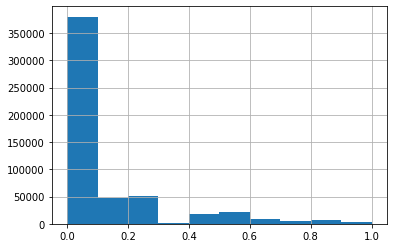

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
import nltk
import re
nltk.download("stopwords")
nltk.download('wordnet')

wpt = nltk.WordPunctTokenizer()
lem = nltk.WordNetLemmatizer()
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def preprocess(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower().strip()
    tokens = wpt.tokenize(doc)
    tokens = [
            lem.lemmatize(token)
            for token in tokens
            if token not in sw
            ]
    doc = ' '.join(tokens)
    return doc

In [ ]:
corpus = X_train

norm_corpus = list(
        map(
            preprocess, corpus
            )
        )
norm_corpus[:10]

['oral history ever say nazi eugenic experiment native child mcgill full knowledge government yup say happened say didnt',
 'marijuana le harmful human health cigarette widely used ban marijuana reduces stress aggression level leading le crime medical value favorable effect health scientifically proven author also consideration marijuana use legalized market transparent surely better illegal sale drug case young adult le interest harmful drug hence need ban marijuana sale use marijuana cannot cause problem bigger legalized widespread cigarette',
 'look see many woman photo white supremecists woman side',
 'see like others stood south africa year ago agree shame',
 'next theyll coming isi',
 'could left great act nepotism get charles old time alaskan good family one blew vast amount oil wealth instead creating sovereign fund like norwegian steal pfd poor dont pay tax fluff piece doesnt conceal',
 'im gonna say logic teacher would give zero obvious generally speaking competent shooter gu

In [ ]:
X_train = norm_corpus

In [ ]:
corpus = X_test

norm_corpus_test = list(
        map(
            preprocess, corpus
            )
        )
norm_corpus_test[:10]

['interesting sorry hear small business owner getting hit small business rarity today world hope adequate insurance help get gallery going juneau smash grab jewelry store gold ring taken perhaps drug problem something',
 'take consideration motley already thinking million democrat',
 'guess somewhat positive portrayal post fair prefer smear get one kick cat professor unlike detractor continually habitually come across reasoned fair logical perhaps simply based opinionson tumblr posting people feeling might appeal bit opponent professor peterson speaks great many society perpetually aggrieved greatest sin',
 'according leading public finance environmental economist ted gayer kip viscusi omb properly confines computation social cost pollution domestic cost standard hawaii resident held responsible fracking practice regulatory failure state',
 'great ever even thinking break monopoly corporate trust thats far much juggernaut u consumer people tolerate',
 'absolute bull crap poke bear deca

In [ ]:
X_test = norm_corpus_test

In [ ]:
# Celda 1
vectoraizer = CountVectorizer()
xvect = vectoraizer.fit_transform(X_train)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_features=5, n_estimators=50, n_jobs=-1, random_state=42, max_depth=10)
reg.fit(xvect, y_train)

X_testv = vectoraizer.transform(X_test)
pred =  reg.predict(X_testv)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
regmse = metrics.mean_squared_error(y_test, pred)

Mean Squared Error (MSE): 0.039019508748028314


Como parte del preprocesamiento, se noramlizó el texto eliminando signos de puntuación y palabras que no aportan al sentido global del texto, además de convertir texto en vectores que puedan ser procesados por los modelos a través de CountVectorizer.  Se estimó con estos vectores un modelo por Random Forest y al validar en test se calculó un MSE de 0.039019.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vectoraizer = CountVectorizer(ngram_range=(3, 3))
xvect = vectoraizer.fit_transform(X_train)

regtri = RandomForestRegressor(max_features=5, n_estimators=50, n_jobs=-1, random_state=42, max_depth=10)
regtri.fit(xvect, y_train)

X_testv = vectoraizer.transform(X_test)
predtri =  regtri.predict(X_testv)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predtri))
regmsetri = metrics.mean_squared_error(y_test, predtri)

Mean Squared Error (MSE): 0.03903351143799119


A través de CountVectorizer se convirtió al texto en vectores de trigramas.  Se estimó con estos vectores un modelo por Random Forest y al validar en test se calculó un un MSE de 0.03903, levemente más alto que el estimado en el punto anterior, por lo que se puede decir que no mejora el desempeño.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
La función TfidfVectorizer convierte una colección de documentos sin procesar en una matriz de TF-IDF. Term Frequency Inverse Document Frequency es una medida de frecuencia de término y frecuencia inversa de documento, el valor TF-IDF aumenta proporcionalmente de acuerdo al número de veces que una palabra aparece y es compensada por la frecuencia de esta en la colección de documentos (el número de documentos en la cual aparece). Se calcula para una palabra $i$ en el documento $j$:

$$
  w_{i,j} = tf_{i,j}*log(\frac{N}{df_{i}})
$$

donde $tf_{i,j}$ es el número de ocurrencias de $i$ en $j$, $df_{i}$ es el número de documentos que contienen $i$ y $N$ es el número total de documentos.

CountVectorizer y TidfVectorizer son métodos para convertir datos de texto en vectores, para ingresar a un modelo de predicción. CountVectorizer proporciona la frecuencia de cada palabra en el corpus, lo que da como resultado un sesgo a favor de las palabras más frecuentes ignorando palabras raras que podrían  ayudado a procesar los datos de manera más eficiente. La ventaja de TF-IDF es que expresa cuán importante es una palabra en el corpus, ponderando la frecuencia y su peso, esto es útil para el análisis y construcción del modelo ya que ayuda a eliminar las palabras menos importantes y reducir las dimensiones de entrada.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vectoraizer = TfidfVectorizer()
xvect = vectoraizer.fit_transform(X_train)

regtfid = RandomForestRegressor(max_features=5, n_estimators=50, n_jobs=-1, random_state=42, max_depth=10)
regtfid.fit(xvect, y_train)

X_testv = vectoraizer.transform(X_test)
predtfid =  regtfid.predict(X_testv)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predtfid))
regmsetfid = metrics.mean_squared_error(y_test, predtfid)

Mean Squared Error (MSE): 0.0390179380535067


A través de TfidfVectorizer se convirtió al texto en vectores.  Se estimó con estos vectores un modelo por Random Forest y al validar en test se calculó un un MSE de 0.039017, levemente más bajo que los transformados con CountVectorizer.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

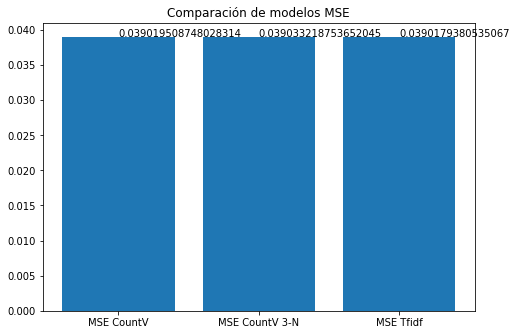

In [ ]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MSE")
ejeX = ['MSE CountV' ,'MSE CountV 3-N', 'MSE Tfidf']
ejeY = [regmse,regmsetri,regmsetfid]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Al análizar los tres modelos estimados, se puede observar que aquel transformado con tokenización de TfidfVectorizer es el de mejor desempeño con el MSE más bajo. De esta manera, se puede observar que la asignación de importancia a las palabras por frecuencia no tiene el mejor desempeño, además de aumentar el tiempo de procesamiento.